# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
#kmr weatherpy workbook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# Test to determine if the API key and url are working before gettign too far down the road
# Build query URL and request your results in Celsius
url = "http://api.openweathermap.org/data/2.5/weather?"
town = "Burundi"
# Get weather data
xquery_url = url + "appid=" + api_key + "&q=" + town
# Get temperature from JSON response
weather_response = requests.get(xquery_url).json()
weather_json = weather_response['main']['temp']
# Report temperature
print(f"The weather API responded with: {weather_json}.")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

The weather API responded with: 291.6.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
fullset = len(cities)
print("The number of randomly generated cities in the project scope")
print(fullset)
#print(cities)

The number of randomly generated cities in the project scope
629


In [5]:
# Build a data frame to capture each cities weather information
cities_df = {
    "City": cities,
}
cities_df = pd.DataFrame(cities_df)
print("Exhibit 1a: Cities in the project with a place to capture weather data")

# set up additional columns to hold information
cities_df['Lat'] = ""
cities_df['Lng'] = ""
cities_df['Temp Max'] = ""
cities_df['Humidity'] = ""
cities_df['Cloudiness'] = ""
cities_df['Wind Speed'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df.head()

Exhibit 1a: Cities in the project with a place to capture weather data


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,omsukchan,,,,,,,,
1,rikitea,,,,,,,,
2,illoqqortoormiut,,,,,,,,
3,sao filipe,,,,,,,,
4,santa isabel do rio negro,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

counter = 0

# Loop through the list of cities and perform a request for data on each
print("Checkpoint: Confirmation listing of cities processed through OpenWeather Site")

for index, row in cities_df.iterrows():
    cityname = row['City']
    counter = counter + 1
    
    if counter >= 61:
        print("**Done running the first batch**")
        break
    
    if counter <= 60:
        time.sleep(1)
        print(f"Processing Record {counter} of {fullset}. City = {cityname}")
        
        try:
            response = requests.get(query_url + cityname).json()   
            cities_df.loc[index, 'Lat'] = response['coord']['lat']
            cities_df.loc[index, 'Lng'] = response['coord']['lon']
            cities_df.loc[index, 'Temp Max'] = response['main']['temp_max']
            cities_df.loc[index, 'Humidity'] = response['main']['humidity']
            cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
            cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
            cities_df.loc[index, 'Country'] = response['sys']['country']
            cities_df.loc[index, 'Date'] = response['dt']
         
        except (KeyError, IndexError, ValueError):
            print(f"... skipped over  " + cityname + "  because it lacked sufficient information")
            #cities_df.remove(cityname)
            pass

# First attempt structure going to lists instead of dataframes
# Create lists to capture date for use in data frame
#cities = ['London', 'xxToronto','nanortalik', 'haines junction', 'ancud', 'mikkeli', 'daru', 'vaini', 'bethel', 'vostok']
#cities = cities
# lat = []
# lng = []
# temp_max = []
# humidity = []
# cloudiness = []
# wind_speed = []
# country = []
# date = []
#for city in cities:
#             lat.append(response['coord']['lat'])
#             lng.append(response['coord']['lon'])
#             temp_max.append(response['main']['temp_max'])
#             humidity.append(response['main']['humidity'])
#             cloudiness.append(response['clouds']['all'])
#             wind_speed.append(response['wind']['speed'])
#             country.append(response['sys']['country'])
#             date.append(response['dt'])


Checkpoint: Confirmation listing of cities processed through OpenWeather Site
Processing Record 1 of 629. City = omsukchan
Processing Record 2 of 629. City = rikitea
Processing Record 3 of 629. City = illoqqortoormiut
... skipped over  illoqqortoormiut  because it lacked sufficient information
Processing Record 4 of 629. City = sao filipe
Processing Record 5 of 629. City = santa isabel do rio negro
Processing Record 6 of 629. City = barrow
Processing Record 7 of 629. City = qaanaaq
Processing Record 8 of 629. City = nikolskoye
Processing Record 9 of 629. City = bubaque
Processing Record 10 of 629. City = new norfolk
Processing Record 11 of 629. City = kodiak
Processing Record 12 of 629. City = bunawan
Processing Record 13 of 629. City = tahta
Processing Record 14 of 629. City = olafsvik
Processing Record 15 of 629. City = grand river south east
... skipped over  grand river south east  because it lacked sufficient information
Processing Record 16 of 629. City = georgetown
Processing Re

In [8]:
cities_df = cities_df.dropna(how='any')
cities_df["Humidity"]= pd.to_numeric(cities_df["Humidity"])
cities_df["Temp Max"]= pd.to_numeric(cities_df["Temp Max"])
print("Exhibit 1b: Cities in the project with a place to capture weather data")
cities_df.head()

Exhibit 1b: Cities in the project with a place to capture weather data


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,omsukchan,62.53,155.8,-11.88,89.0,0,2.68,RU,1603306757
1,rikitea,-23.12,-134.97,23.26,66.0,5,3.81,PF,1603306758
3,sao filipe,14.9,-24.5,28.76,62.0,79,2.19,CV,1603306761
4,santa isabel do rio negro,-0.41,-65.02,33.77,47.0,88,1.75,BR,1603306762
5,barrow,71.29,-156.79,1.00,98.0,90,7.2,US,1603306763


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# #Export the randomly generated list of cities to to a csv file
cities_df.to_csv("output_data/1bex_citiesroster.csv", index=False, header=True)

# Create a data frame from the response lists

# dictionary = {
#     "City": cities,
#     "Lat": lat,
#     "Lng": lng,
#     "Temp Max": temp_max,
#     "Humidity": humidity,
#     "Cloudiness": cloudiness,
#     "Wind Speed": wind_speed,
#     "Country": country,
#     "Date": date
# }
# dictionary = pd.DataFrame(dictionary)
# print("Exhibit 2: Table with in scope cities and their weather data")
# dictionary.head()

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Inspect and remove cities with humidity greater than 100%
print("Exhibit 2: Table with in scope cities and their weather data. (Note: Cities with humidity >100% removed)")
#cities_df["Humidity"]= pd.to_numeric(cities_df["Humidity"])
dehumidified = cities_df.loc[cities_df["Humidity"] <= 100]
dehumidified.head()

Exhibit 2: Table with in scope cities and their weather data. (Note: Cities with humidity >100% removed)


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,omsukchan,62.53,155.8,-11.88,89.0,0,2.68,RU,1603306757
1,rikitea,-23.12,-134.97,23.26,66.0,5,3.81,PF,1603306758
3,sao filipe,14.9,-24.5,28.76,62.0,79,2.19,CV,1603306761
4,santa isabel do rio negro,-0.41,-65.02,33.77,47.0,88,1.75,BR,1603306762
5,barrow,71.29,-156.79,1.00,98.0,90,7.2,US,1603306763


In [11]:
print("Exhibit 3: List of cities removed from project because humidity was greater than 100% (blank if none)")
humidoutliers = cities_df.loc[cities_df["Humidity"] > 100]
humidoutliers.head()

Exhibit 3: List of cities removed from project because humidity was greater than 100% (blank if none)


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date


In [22]:
# Export the data frame to a csv file
dehumidified.to_csv("output_data/2ex_cleancitydata.csv", index=False, header=True)
humidoutliers.to_csv("output_data/3ex_citieswithtoomuchhumidity.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

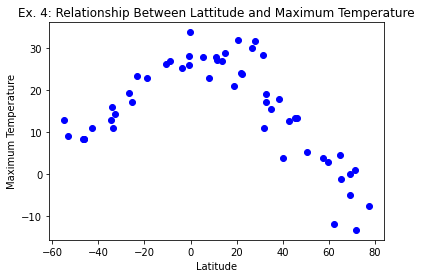

In [23]:
# Compare latitude to temperature
x_axis = dehumidified["Lat"]
y_axis = dehumidified["Temp Max"]
   
plt.title("Ex. 4: Relationship Between Lattitude and Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regress_values = x_axis * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x_axis,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.savefig("output_data/4chart_lat2temp.png")
plt.show()
# print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
# print(f"The line equation is as follows:  {line_eq}")

## Latitude vs. Humidity Plot

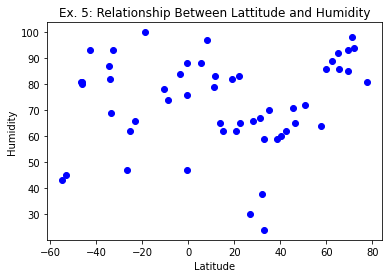

In [24]:
# Compare latitude to humidity
x_axis = dehumidified["Lat"]
y_axis = dehumidified["Humidity"]
   
plt.title("Ex. 5: Relationship Between Lattitude and Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regress_values = x_axis * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x_axis,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.savefig("output_data/5chart_lat2humidity.png")
plt.show()
# print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
# print(f"The line equation is as follows:  {line_eq}")

## Latitude vs. Cloudiness Plot

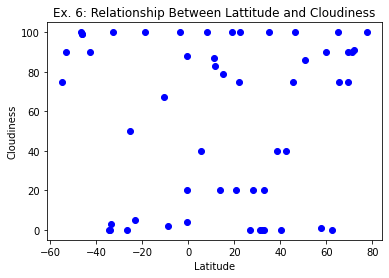

In [25]:
# Compare latitude to cloudiness
x_axis = dehumidified["Lat"]
y_axis = dehumidified["Cloudiness"]
   
plt.title("Ex. 6: Relationship Between Lattitude and Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# regress_values = x_axis * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.plot(x_axis,regress_values,"r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.savefig("output_data/6chart_lat2cloudiness.png")
plt.show()
# print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
# print(f"The line equation is as follows:  {line_eq}")

## Latitude vs. Wind Speed Plot

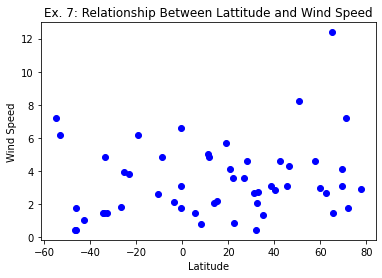

In [26]:
# Compare latitude to wind speed
x_axis = dehumidified["Lat"]
y_axis = dehumidified["Wind Speed"]
   
plt.title("Ex. 7: Relationship Between Lattitude and Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# regress_values = x_axis * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.plot(x_axis,regress_values,"r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.savefig("output_data/7chart_lat2windspeed.png")
plt.show()
# print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
# print(f"The line equation is as follows:  {line_eq}")

## Linear Regression

In [27]:
# See above

In [30]:
# Build a northern hemisphere data frame
northern = dehumidified.loc[dehumidified["Lat"] >= 0]
print("Exhibit 8: Table of cities at or north of equator. (Note: Cities with humidity >100% removed)")
northern.to_csv("output_data/8ex_northernhemisphere.csv", index=False, header=True)
northern.head()

Exhibit 8: Table of cities at or north of equator. (Note: Cities with humidity >100% removed)


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,omsukchan,62.53,155.8,-11.88,89.0,0,2.68,RU,1603306757
3,sao filipe,14.9,-24.5,28.76,62.0,79,2.19,CV,1603306761
5,barrow,71.29,-156.79,1.00,98.0,90,7.2,US,1603306763
6,qaanaaq,77.48,-69.36,-7.44,81.0,100,2.92,GL,1603306764
7,nikolskoye,59.7,30.79,3.00,86.0,90,3,RU,1603306532


In [31]:
# Build a southern hemisphere data frame
southern = dehumidified.loc[dehumidified["Lat"] < 0]
print("Exhibit 9: Table of cities south of equator. (Note: Cities with humidity >100% removed)")
southern.to_csv("output_data/9ex_southernhemisphere.csv", index=False, header=True)
southern.head()

Exhibit 9: Table of cities south of equator. (Note: Cities with humidity >100% removed)


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
1,rikitea,-23.12,-134.97,23.26,66.0,5,3.81,PF,1603306758
4,santa isabel do rio negro,-0.41,-65.02,33.77,47.0,88,1.75,BR,1603306762
9,new norfolk,-42.78,147.06,11.00,93.0,90,1.04,AU,1603306768
17,bredasdorp,-34.53,20.04,13.00,87.0,0,1.5,ZA,1603306778
19,ushuaia,-54.8,-68.3,13.00,43.0,75,7.2,AR,1603306709


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

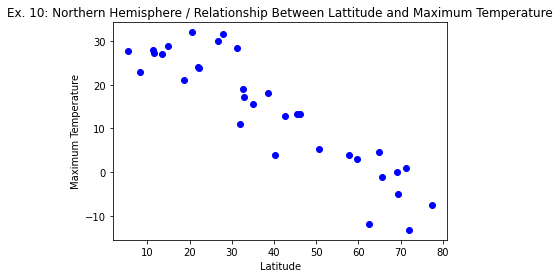

In [37]:
#Compare latitude to temperature

x_axis = northern["Lat"]
y_axis = northern["Temp Max"]
   
plt.title("Ex. 10: Northern Hemisphere / Relationship Between Lattitude and Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

# unable to perform regression because slope does not have a value ... 'float' object has not attribute 'shape'
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regress_values = x_axis * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x_axis,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.savefig("output_data/10chart_northlat2temp.png")
plt.show()
# print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
# print(f"The line equation is as follows:  {line_eq}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

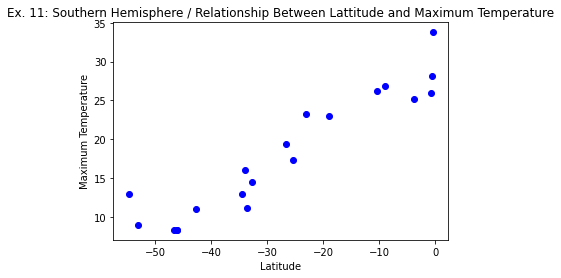

In [41]:
# Compare latitude to temperature

x_axis = southern["Lat"]
y_axis = southern["Temp Max"]
   
plt.title("Ex. 11: Southern Hemisphere / Relationship Between Lattitude and Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

# unable to perform regression because slope does not have a value ... 'float' object has not attribute 'shape'
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# regress_values = x_axis * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.plot(x_axis,regress_values,"r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("output_data/11chart_southlat2temp.png")
plt.show()

# print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
# print(f"The line equation is as follows:  {line_eq}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression